### Загрузим данные и подготовим их к анализу

Импортируем все нужные библиотеки, посомтрим на первые 5 строк сетов, изучим данные, вызовем метод info и посчитаем пропуски

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('csv/visits_info_short.csv')
orders = pd.read_csv('csv/orders_info_short.csv')
costs = pd.read_csv('csv/costs_info_short.csv')

In [3]:
df.head()

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
df.isna().agg(['sum', 'mean'])

User Id  Region  Device  Channel  Session Start  Session End
sum       0.0     0.0     0.0      0.0            0.0          0.0
mean      0.0     0.0     0.0      0.0            0.0          0.0

В данных о визитах пропусков нет, надо поработать с названием колонок и типом данных в Session Start и Session End

In [6]:
df.columns =[c.lower().replace(' ','_') for c in df.columns]

In [7]:
df.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

Посмотрим на таблицу с заказами

In [8]:
orders.head()

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [10]:
orders.isna().agg(['sum', 'mean'])

User Id  Event Dt  Revenue
sum       0.0       0.0      0.0
mean      0.0       0.0      0.0

In [11]:
orders.columns =[c.lower().replace(' ','_') for c in orders.columns]

Посмотрим на таблицу с расходами

In [12]:
costs.head()

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [13]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [14]:
costs.isna().agg(['sum', 'mean'])

dt  Channel  costs
sum   0.0      0.0    0.0
mean  0.0      0.0    0.0

In [15]:
costs.columns =[c.lower().replace(' ','_') for c in costs.columns]

Название колонок привели в порядок, теперь приведем даты к формату `datetime` 

In [16]:
df['session_start'] = pd.to_datetime(df['session_start'])
df['session_end'] = pd.to_datetime(df['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

Посмотрим на уникальные значения в датасетах, это поможет нам составить картину о данных 

In [17]:
dataset = [df, orders, costs]

In [18]:
for t in dataset:
    for index in t.columns:
        row = t[index].nunique()
        print(f'Уникальных значений {index}: {row}')
    print()

Уникальных значений user_id: 150008
Уникальных значений region: 4
Уникальных значений device: 4
Уникальных значений channel: 11
Уникальных значений session_start: 306813
Уникальных значений session_end: 306793

Уникальных значений user_id: 8881
Уникальных значений event_dt: 40163
Уникальных значений revenue: 5

Уникальных значений dt: 180
Уникальных значений channel: 10
Уникальных значений costs: 608



**Описание данных**  


Структура `df` :    

`User Id` — уникальный идентификатор пользователя,  
`Region` — страна пользователя,  
`Device` — тип устройства пользователя,  
`Channel` — идентификатор источника перехода,  
`Session Start` — дата и время начала сессии,  
`Session End` — дата и время окончания сессии.

Структура `orders` :      

`User Id` — уникальный идентификатор пользователя,  
`Event Dt` — дата и время покупки,  
`Revenue` — сумма заказа. 

Структура `costs` :    

`dt` — дата проведения рекламной кампании,  
`Channel` — идентификатор рекламного источника,  
`costs` — расходы на эту кампанию.  

Посмотрим еще раз на наши данные, проверим есть ли дубликаты, посмотрим  что формат изменился на дату, название колонок сохранились корректно

In [19]:
for t in dataset:
    display(t.head())
    display(t.info())
    display(t.duplicated().sum())
    print('--------')

user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


None

0

--------


user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


None

0

--------


dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

0

--------


**Вывод:**  
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года.  
В нашем распоряжении три датасета:
* лог сервера с данными об их посещениях, данные о 150 000 уникальных пользователей
* выгрузка их покупок за этот период, порядка 9000 уникальных пользователей совершивших покупки
* рекламные расходы. 10 реклманых каналов  

Пользователи приходят из 11 каналов, заходят с 4 девайсов и проживают в 4 странах.  
Пропусков нет, явных дубликатов нет. Даты привели к формату `datetime`

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [20]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

 
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [21]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [22]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [23]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [24]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [25]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 


In [26]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [27]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

Создадим профили пользователей.

In [28]:
profiles = get_profiles(df, orders, costs)
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

In [29]:
print(f'Минимальная дата привлечения пользователей: {min(profiles["dt"])}')
print(f'Максимальная дата привлечения пользователей: {max(profiles["dt"])}')

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


В описание проекта говорилось, что данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года, 
У нас получились те же самые даты, можем предположить, что при составлении профилей пользователей данные не потерялись.  
Посмотрим сколько всего платящих пользователей в датафрейме.

In [30]:
print(f'Процент платящих пользователей: {(profiles["payer"].mean() * 100).round(2)}%')

Процент платящих пользователей: 5.92%


In [31]:
profiles.groupby('region')['payer'].agg(['count','sum', 'mean']).\
    rename(columns={'sum': 'pays'}).sort_values(by='mean', ascending=False).reset_index()

region   count  pays      mean
0  United States  100002  6902  0.069019
1        Germany   14981   616  0.041119
2             UK   17575   700  0.039829
3         France   17450   663  0.037994

В приложение приходят из 4 стран - США, Англия, Германия и Франция. Больше всего платящих пользователей приходится на Америку у них же и самая большая доля платящих. 

In [32]:
profiles.groupby('device')['payer'].agg(['count','sum','mean']).\
    rename(columns={'sum': 'pays'}).sort_values(by='mean', ascending=False).reset_index()

device  count  pays      mean
0      Mac  30042  1912  0.063644
1   iPhone  54479  3382  0.062079
2  Android  35032  2050  0.058518
3       PC  30455  1537  0.050468

Как правило в  Procrastinate Pro+ заходят с мобильных устройств, чаще всего с iPhone.  
Пользователи продукции Apple чаще покупают в приложении и с компьютера этот показатель чуть выше чем с телефона. 

Построим сводную таблицу, посмотрим на распределение пользователей по каналам привлечения

In [65]:
profiles.groupby('channel')['payer'].agg(['count','sum','mean']).\
    rename(columns={'sum': 'pays'}).sort_values(by='mean', ascending=False).style.background_gradient()

Получилась довольно объёмная таблица, тяжело сориентироваться в цифрах, для наглядности построим три графика - количество пользователей, количество платящих пользователей и доля

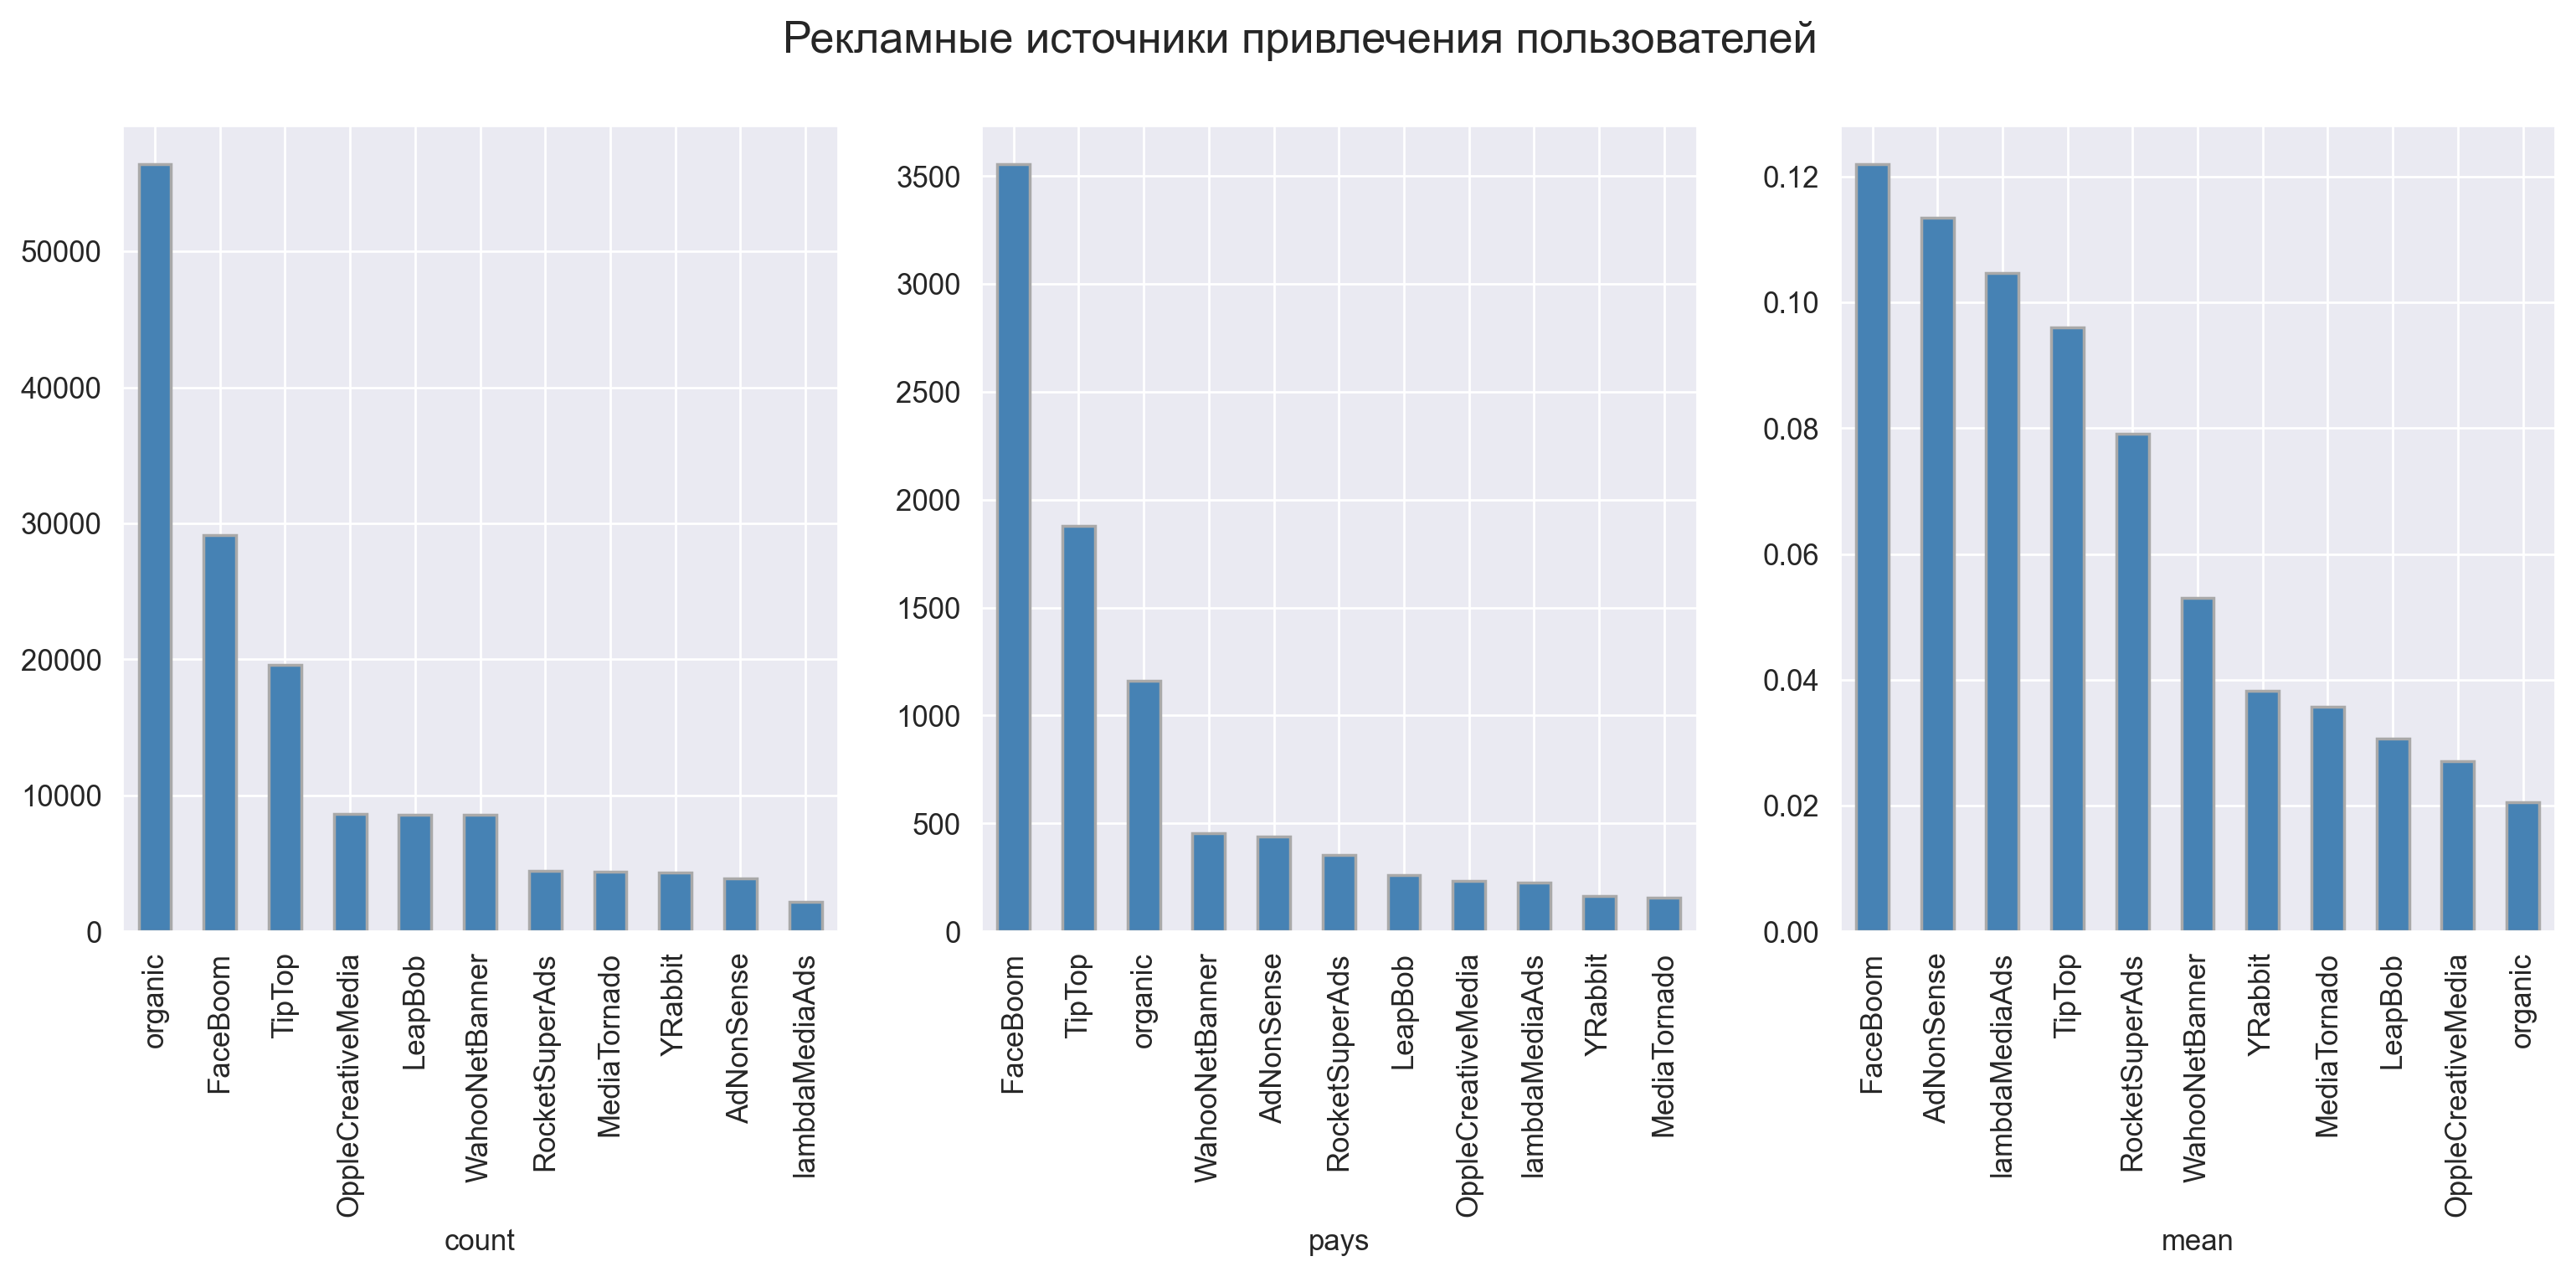

In [34]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(1, 3, figsize=(15,5), dpi= 250)
fig.suptitle('Рекламные источники привлечения пользователей', fontsize = 15)

ax1 = plt.subplot(1, 3, 1)
profiles.groupby('channel')['payer'].agg('count').sort_values(ascending=False).plot(
    kind='bar', color='steelblue', ec="darkgrey",)
plt.xlabel('count')

ax2 = plt.subplot(1, 3, 2)
profiles.groupby('channel')['payer'].agg('sum').sort_values(ascending=False).plot(
    kind='bar', color='steelblue', ec="darkgrey",)
plt.xlabel('pays')

ax3 = plt.subplot(1, 3, 3)
profiles.groupby('channel')['payer'].agg('mean').sort_values(ascending=False).plot(
    kind='bar', color='steelblue', ec="darkgrey",)
plt.xlabel('mean')
plt.show()

Больше всего пользователей приходит не из рекламного источника, так называемый органический трафик, и хоть доля платящих у них мала, они занимаю третье место по количеству платящих пользователей. Больше всего платящих пользователей пришло из FaceBoom.  
Так же можно выделить TipTop, AdNonSense, lambdaMediaAds и WahooNetBanner

**Вывод:**  
У нас есть данные о 150 тысячах уникальных пользователях приложения Procrastinate Pro+, 2/3 из них это жители США.  
Как правило  заходят в приложение с мобильных устройств. Больше всего платящих пользователей пришло из FaceBoom.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [35]:
print(f"Общая сумма расходов на маркетинг: {costs['costs'].sum().round(2)}")

Общая сумма расходов на маркетинг: 105497.3


<div class="alert alert-success">
  
  <b>Комментарий ревьюера</b>
    
  ✔️ Общие затраты посчитали.
</div>

Посмотрим, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [66]:
sts = costs.groupby('channel')['costs'].agg(['count','sum','mean']).sort_values(
    by='mean', ascending=False).style.background_gradient()
sts

У нас есть 10 рекламных источников, на каждый пришлось по 180 рекламных компаний, получается рекламная компания была каждый день. Большего всего денег потратили на TipTop, потом FaceBoom на остальные источники тратилось в разы меньше

In [37]:
costs['month'] = costs['dt'].astype('datetime64[M]')

In [38]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

Посмотрим на динамику изменения расходов во времени по месяцам

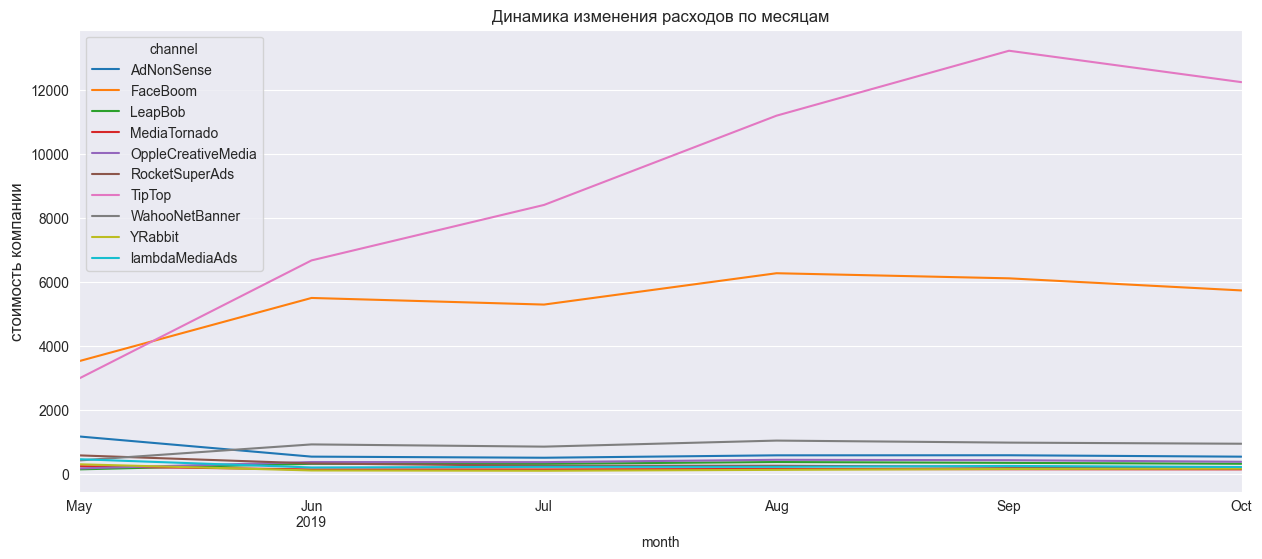

In [39]:
costs.pivot_table(index='month', values='costs', columns='channel', aggfunc='sum').plot(figsize=(15, 6))
plt.title('Динамика изменения расходов по месяцам', fontsize=12) 
plt.ylabel('стоимость компании', fontsize=12)
plt.show()

In [40]:
costs.groupby('month')['costs'].sum().sort_values(ascending=False)

month
2019-09-01    22441.340
2019-10-01    20882.415
2019-08-01    20657.870
2019-07-01    16447.060
2019-06-01    15090.045
2019-05-01     9978.570
Name: costs, dtype: float64

In [41]:
costs[costs['channel'] == 'TipTop'].groupby('month')['costs'].sum().sort_values(ascending=False)

month
2019-09-01    13232.5
2019-10-01    12250.0
2019-08-01    11202.0
2019-07-01     8410.2
2019-06-01     6675.6
2019-05-01     2981.0
Name: costs, dtype: float64

In [42]:
costs[costs['channel'] == 'FaceBoom'].groupby('month')['costs'].sum()

month
2019-05-01    3524.4
2019-06-01    5501.1
2019-07-01    5294.3
2019-08-01    6274.4
2019-09-01    6114.9
2019-10-01    5736.5
Name: costs, dtype: float64

Расходы на рекламную компанию постоянно растут, самые большие расходы были в сентябре и октябре 2019г.   
Больше всего тратили на TipTop, расходы на FaceBoom с июня по октябрь были высоки, но приблизительно на одном и том же уровне.

Построим график понедельно, что бы более наглядно посмотреть на динамику расходов

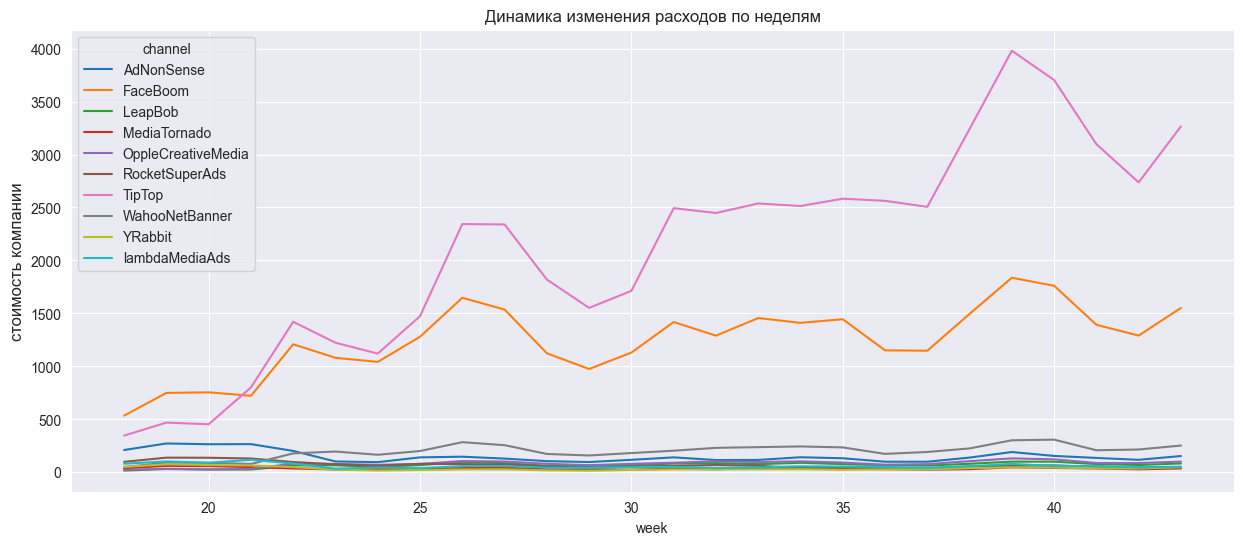

In [43]:
costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot(figsize=(15, 6))
plt.title('Динамика изменения расходов по неделям', fontsize=12)
plt.ylabel('стоимость компании', fontsize=12)
plt.show()

На недельном графике можно выделить несколько скачков, это 22 неделя, 26 неделя и рост с 38 недели.  
Построим отдельно график с 25 по 42 неделю.

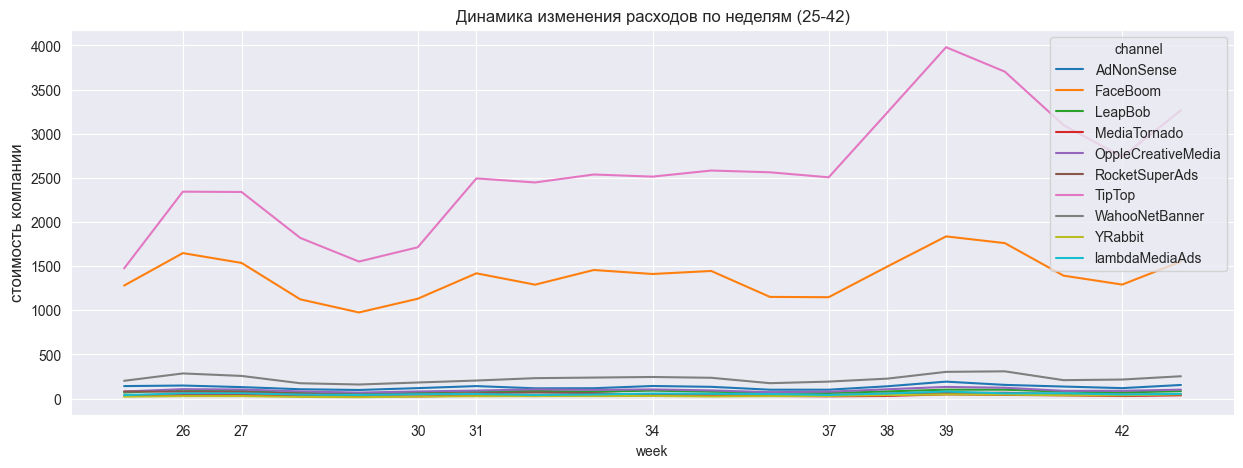

In [44]:
costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').loc[25:43].plot(
    figsize=(15, 5),xticks=(26, 27, 30, 31, 34, 37, 38, 39, 42) )
plt.title('Динамика изменения расходов по неделям (25-42)', fontsize=12)
plt.ylabel('стоимость компании', fontsize=12)
plt.show()

Для удобства построим сводную таблицу

In [45]:
costs.groupby('week')['costs'].sum().sort_values(ascending=False).iloc[:6]

week
39    6784.580
40    6365.370
43    5601.140
38    5473.535
41    5190.355
26    4837.120
Name: costs, dtype: float64

In [46]:
costs[costs['channel'] == 'TipTop'].groupby('week')['costs'].sum().sort_values(ascending=False).iloc[:6]

week
39    3979.5
40    3703.0
43    3265.5
38    3241.0
41    3097.5
42    2737.0
Name: costs, dtype: float64

Больше всего расходов на рекламную компанию было с 38 по 43 неделю, это как раз Сентябрь и Октябрь.  
На графике виден скачок на 25-26 неделе, потом расходы сократились на пару недель, с 31 по 37 расходы вышли на уровень конца июня начало июля и с 38 недели пошли вверх.   
По графикам видно, что траты на TipTop и FaceBoom в разы превосходят траты на другие рекламные компании.  
Затраты на TipTop постоянно растут. 

Исключим органических пользователей и высчитаем САС

In [47]:
profiles[profiles['channel'] != 'organic']['acquisition_cost'].mean().round(2)

1.13

Посмотрим стоимость привлечения из каждого источника

In [48]:
profiles.query('channel !="organic"').groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False)

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
Name: acquisition_cost, dtype: float64

Дороже всего обходятся пользователи как раз из TipTop, стоимость их привлечения более чем в два раза превышает стоимость привлечения из других источников

**Вывод:**    
У нас есть 10 рекламных источников, общая сумма расходов на маркетинг: 105497.  
Рекламные  компании были каждый день, больше всего потратили на TipTop и FaceBoom, пик трат пришелся с 38 по 43 неделю, это сентябрь и октябрь. Самыми дорогими оказалось привлечение пользователей из TipTop

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Отфильтруем датафрем и оставим только пользователей пришедших из рекламных компаний

In [49]:
profiles = profiles[profiles['channel'] != 'organic']
profiles.sample(4)

user_id            first_ts     channel  device         region  \
2162     14600091975 2019-08-19 22:51:59      TipTop     Mac  United States   
14831    98700954662 2019-05-15 19:06:01  AdNonSense  iPhone         France   
143219  955685654095 2019-07-04 14:22:12    FaceBoom  iPhone  United States   
58185   386089238409 2019-08-15 20:48:02      TipTop  iPhone  United States   

                dt      month  payer  acquisition_cost  
2162    2019-08-19 2019-08-01  False          3.025641  
14831   2019-05-15 2019-05-01  False          1.050000  
143219  2019-07-04 2019-07-01  False          1.111957  
58185   2019-08-15 2019-08-01  False          3.115385

На календаре 1 ноября 2019 года, данные у нас есть по 27.10.2019, установим момент 27.10 и горизонт анализа данных в 14 дней.

In [50]:
observation_date = datetime(2019, 10, 27).date()  
horizon_days =  14

Для начала оценим общую ситуацию — посмотрим на окупаемость рекламы.  
Рассчитаем и визуализируем `LTV` и `ROI`, вызвав функции `get_ltv()` и `plot_ltv_roi()`

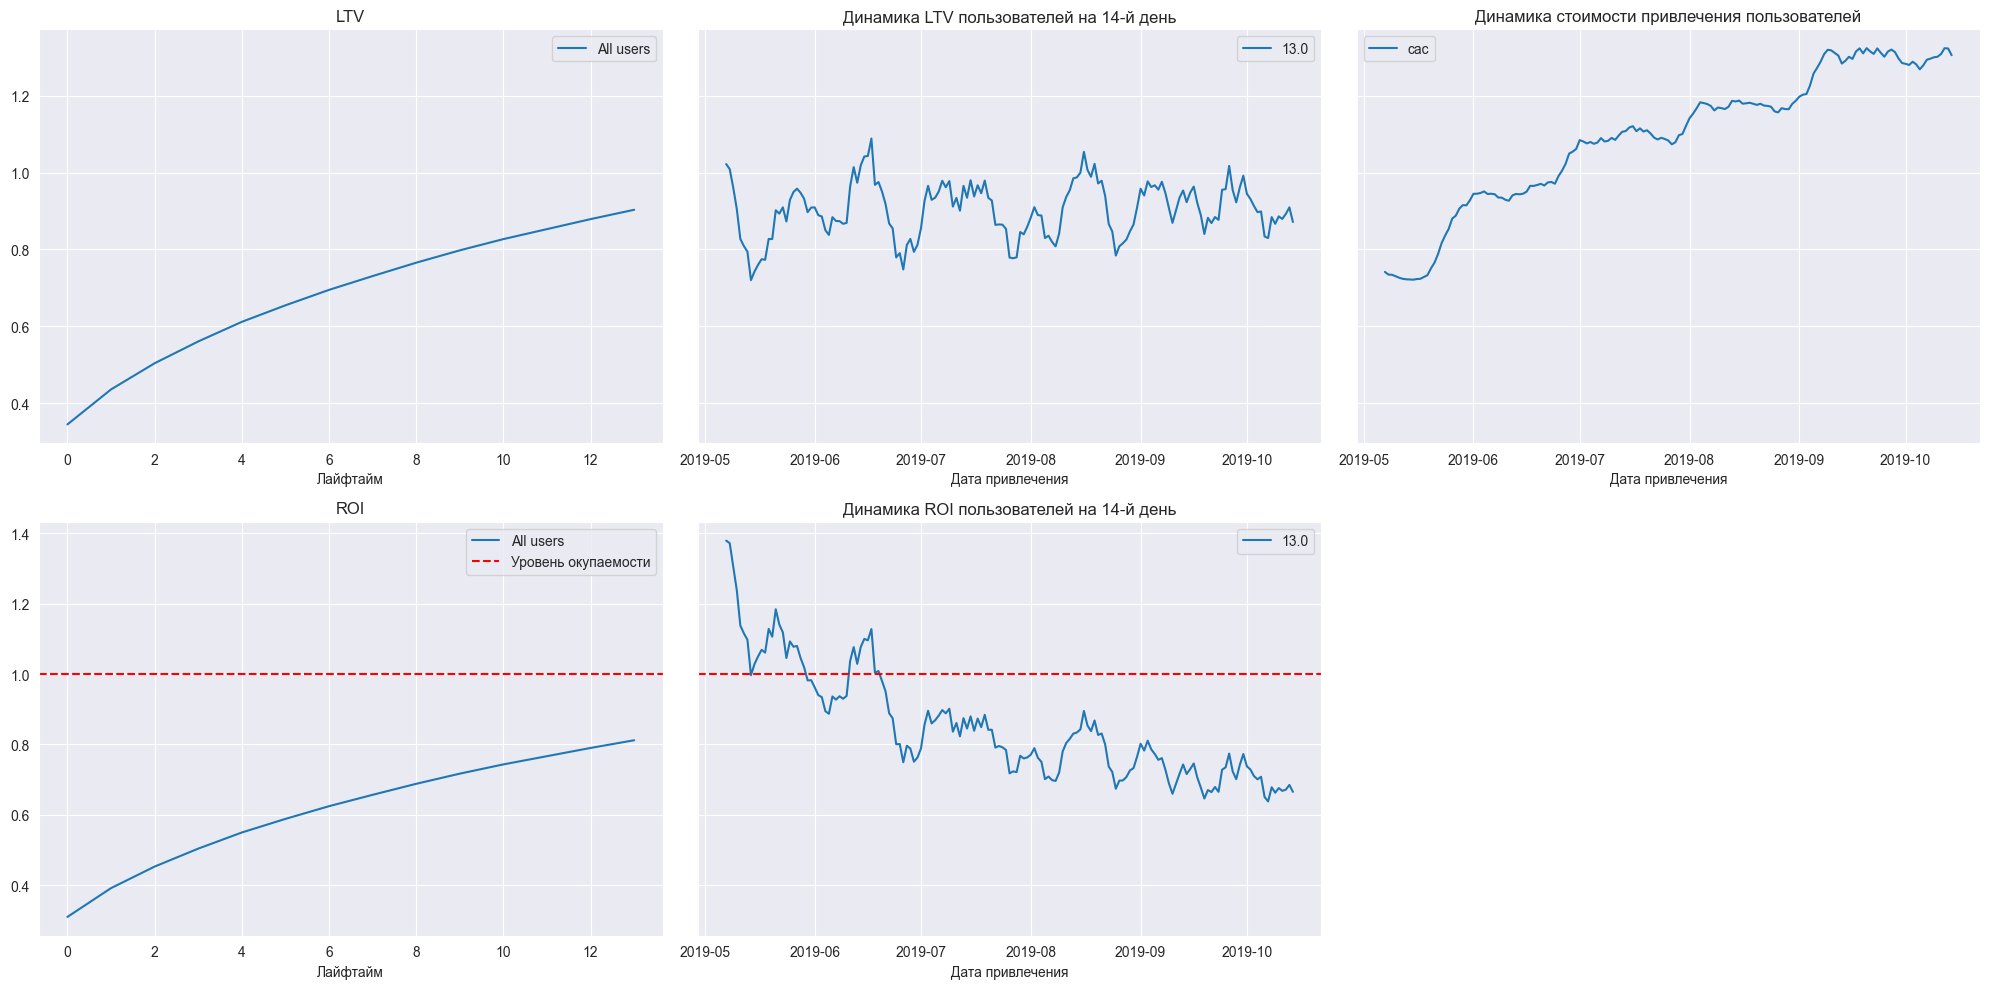

In [51]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По графикам можно сделать такие выводы:
* LTV растет день ото дня, на 14 день пользователи показывают какую-то активность
* Реклама не окупается. ROI в конце — чуть выше 80%.
* С самого начала динамика ROI направлена вниз, то есть каждый новый пользователь приносил прибыли меньше чем предыдущий
* CAC растет. Каждый новый клиент обходится дороже 

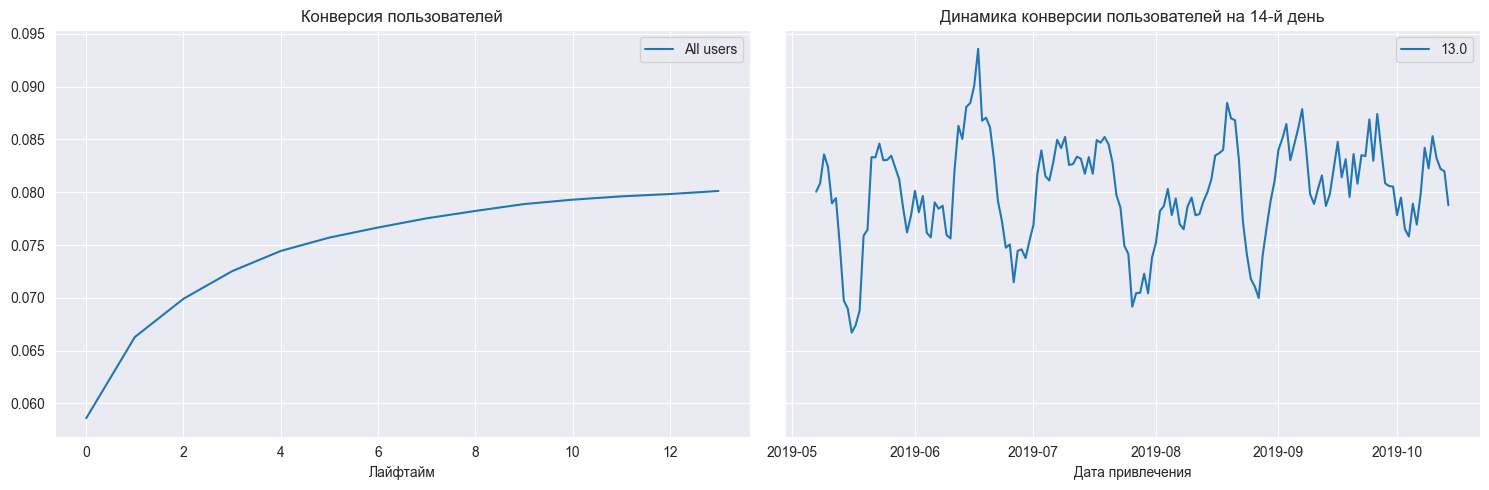

In [52]:
# смотрим конверсию 
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

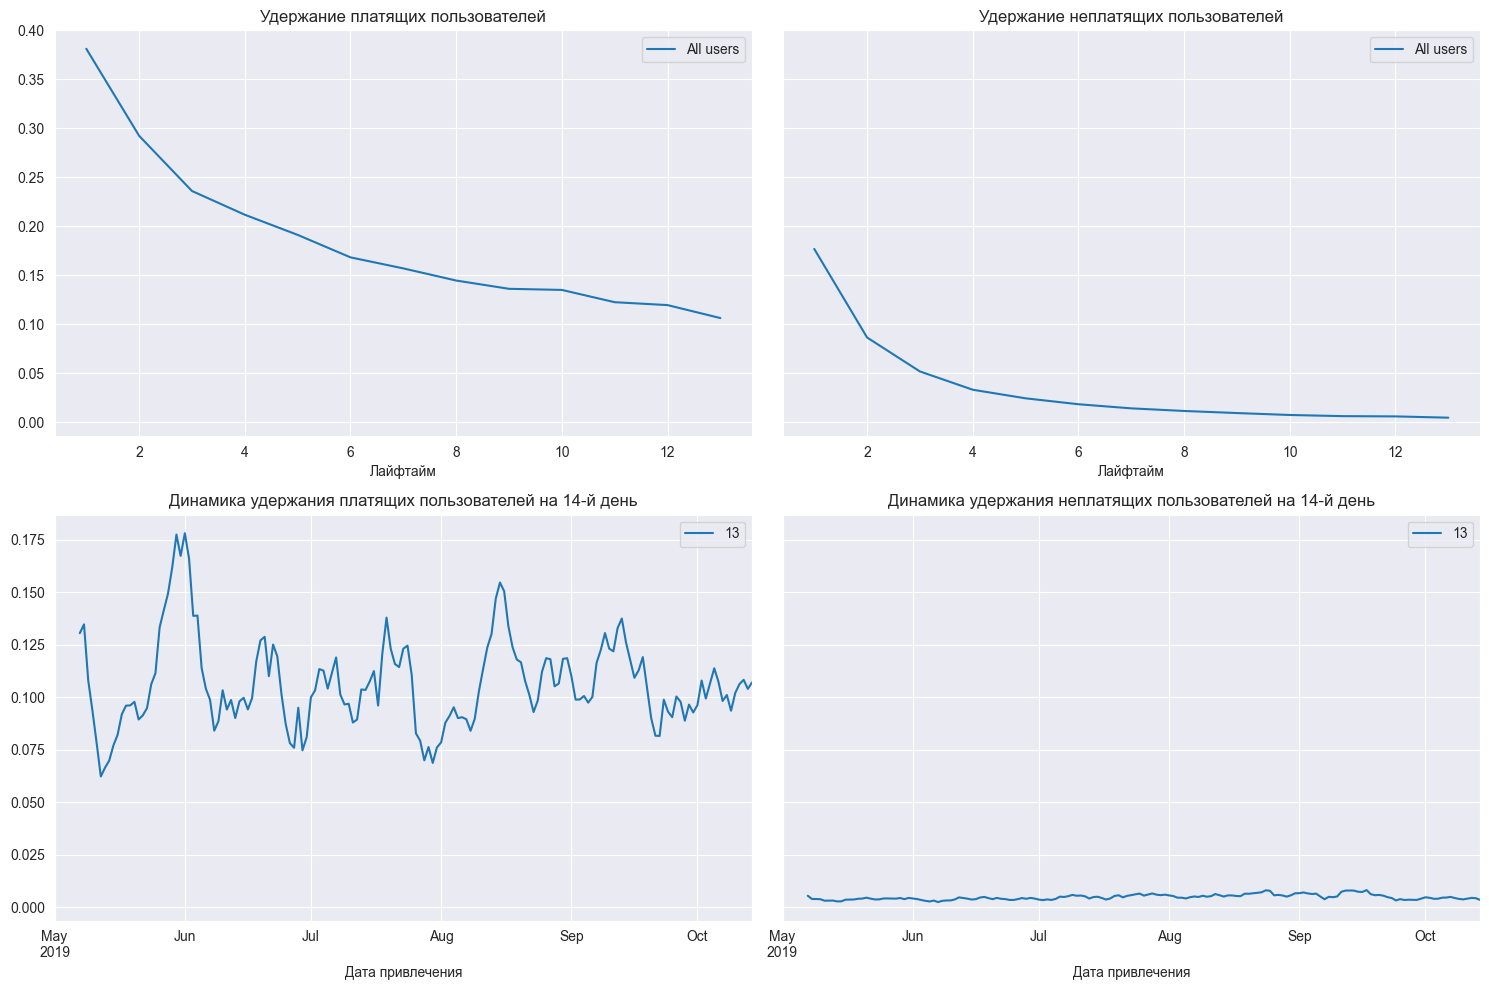

In [53]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, df, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

У нас хорошая конверсия, но очень слабое удержание. Можно заметить, что удержание зависит от даты рекламной компании.
Позже можно будет более детально изучить этот момент

Сейчас, несмотря на огромные вложения в рекламу, последние несколько месяцев Procrastinate Pro терпит убытки.
Чтобы разобраться в причинах, пройдём по всем доступным характеристикам пользователей — стране, источнику и устройству первого посещения.  

Начнём с разбивки по странам

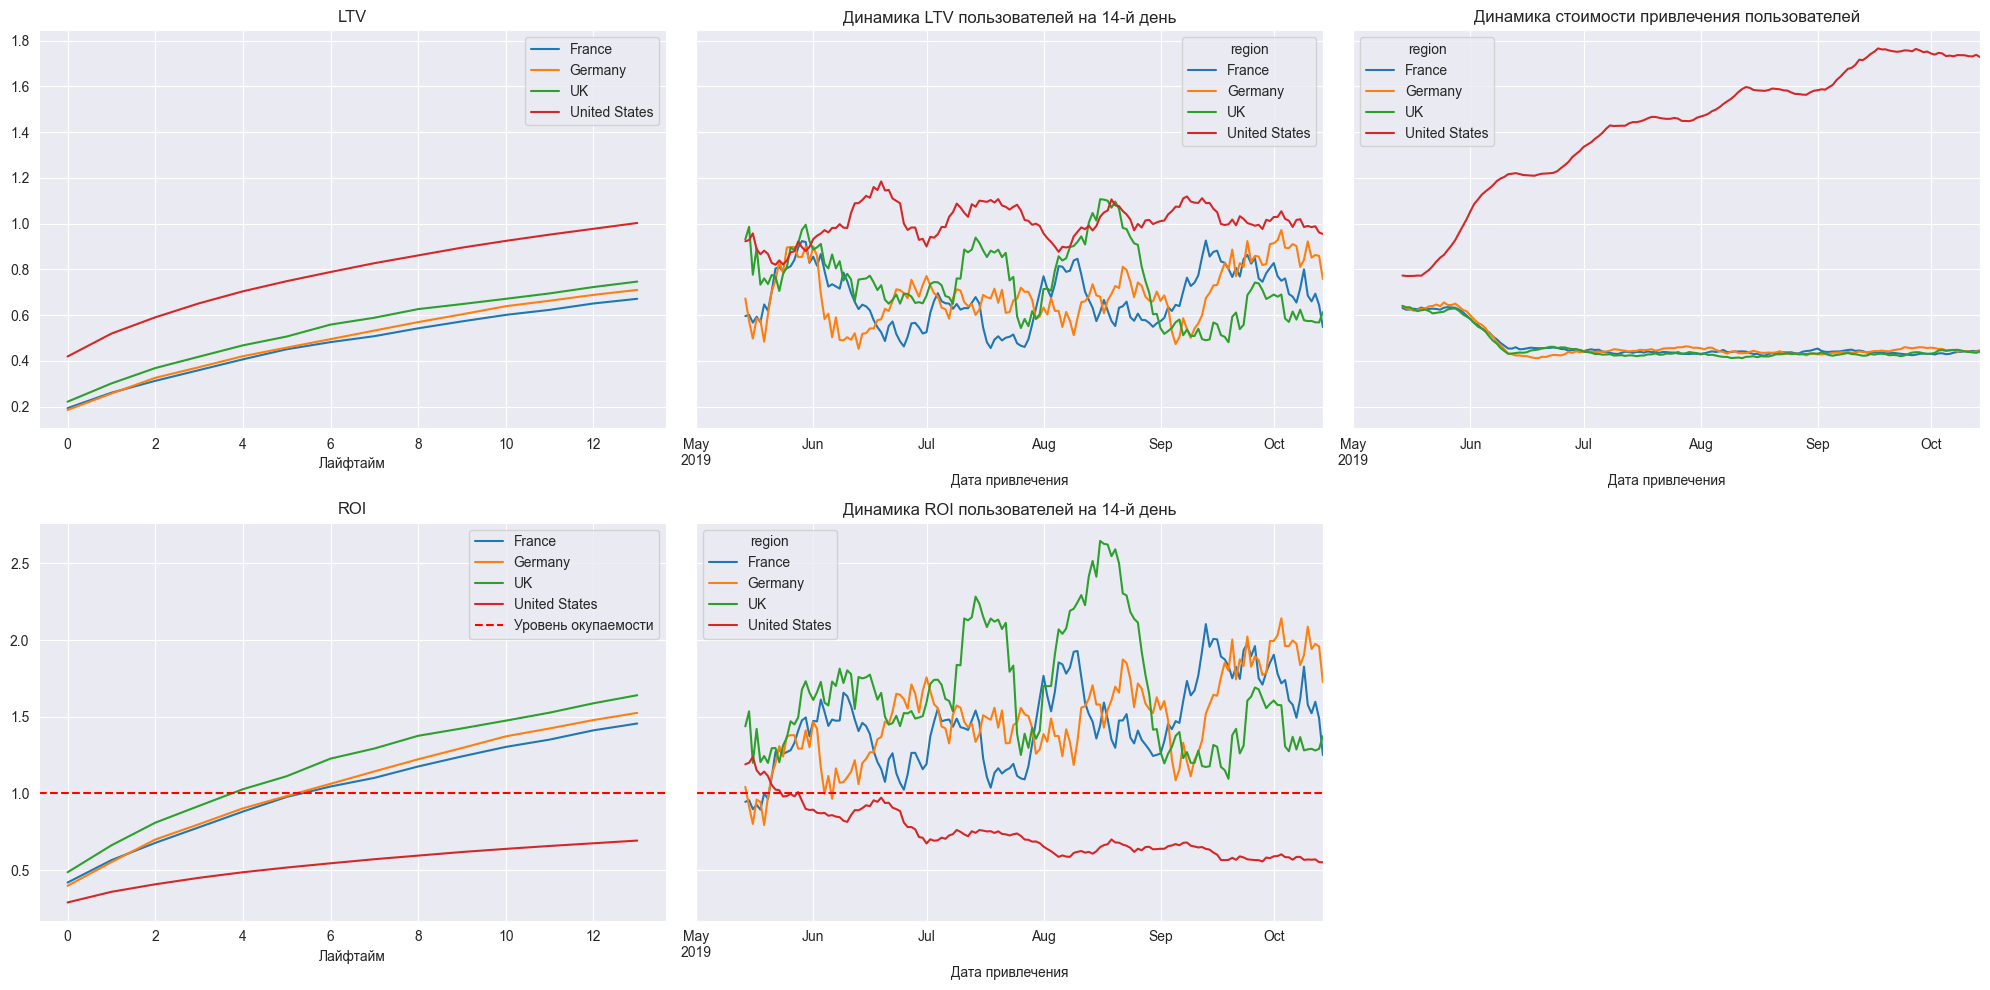

In [54]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

На графиках мы видим, что Американцы приносят больше всего денег приложению, но  стоимость их привлечения постоянно растет, и в отличае от Европейцев, эти пользователи не окупаются.  
С июня CAC упал для Европы, но LTV остался на том же уровне, что способствовало небольшому росту ROI  
Стоит присмотреться к Англичанам и внимательнее изучить когорты, тк у их графиков очень большая волатильность.  

Посмотрим на конверсию и удержание пользователей

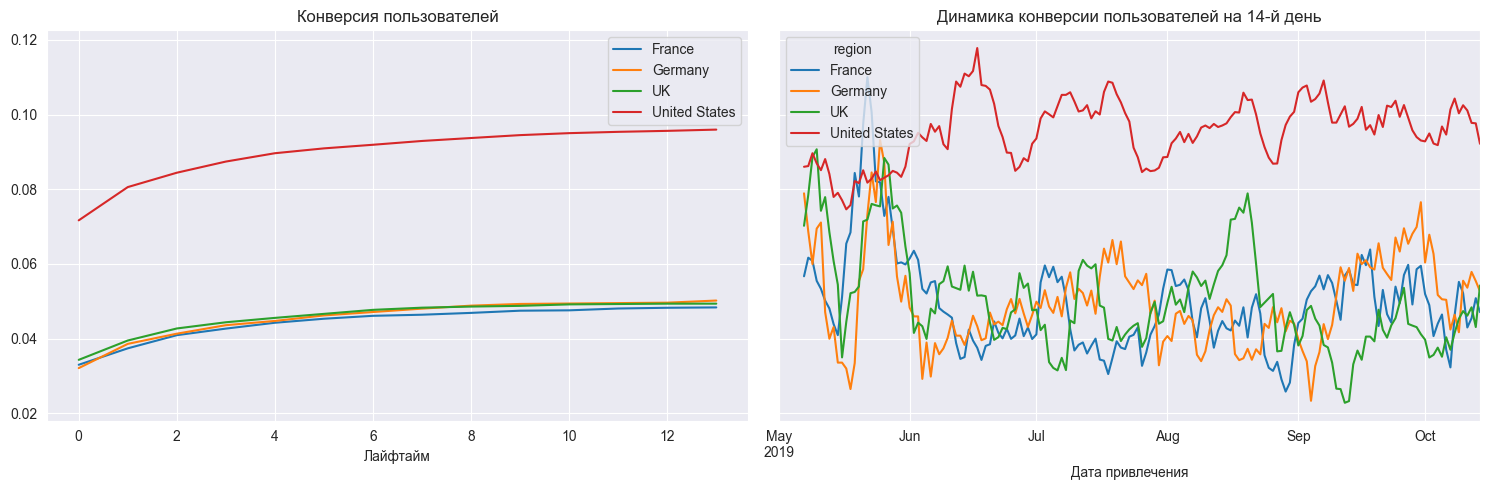

In [55]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, пользователи из Америки конвертируются очень хорошо, причём постоянно. Видимо, дело в удержании

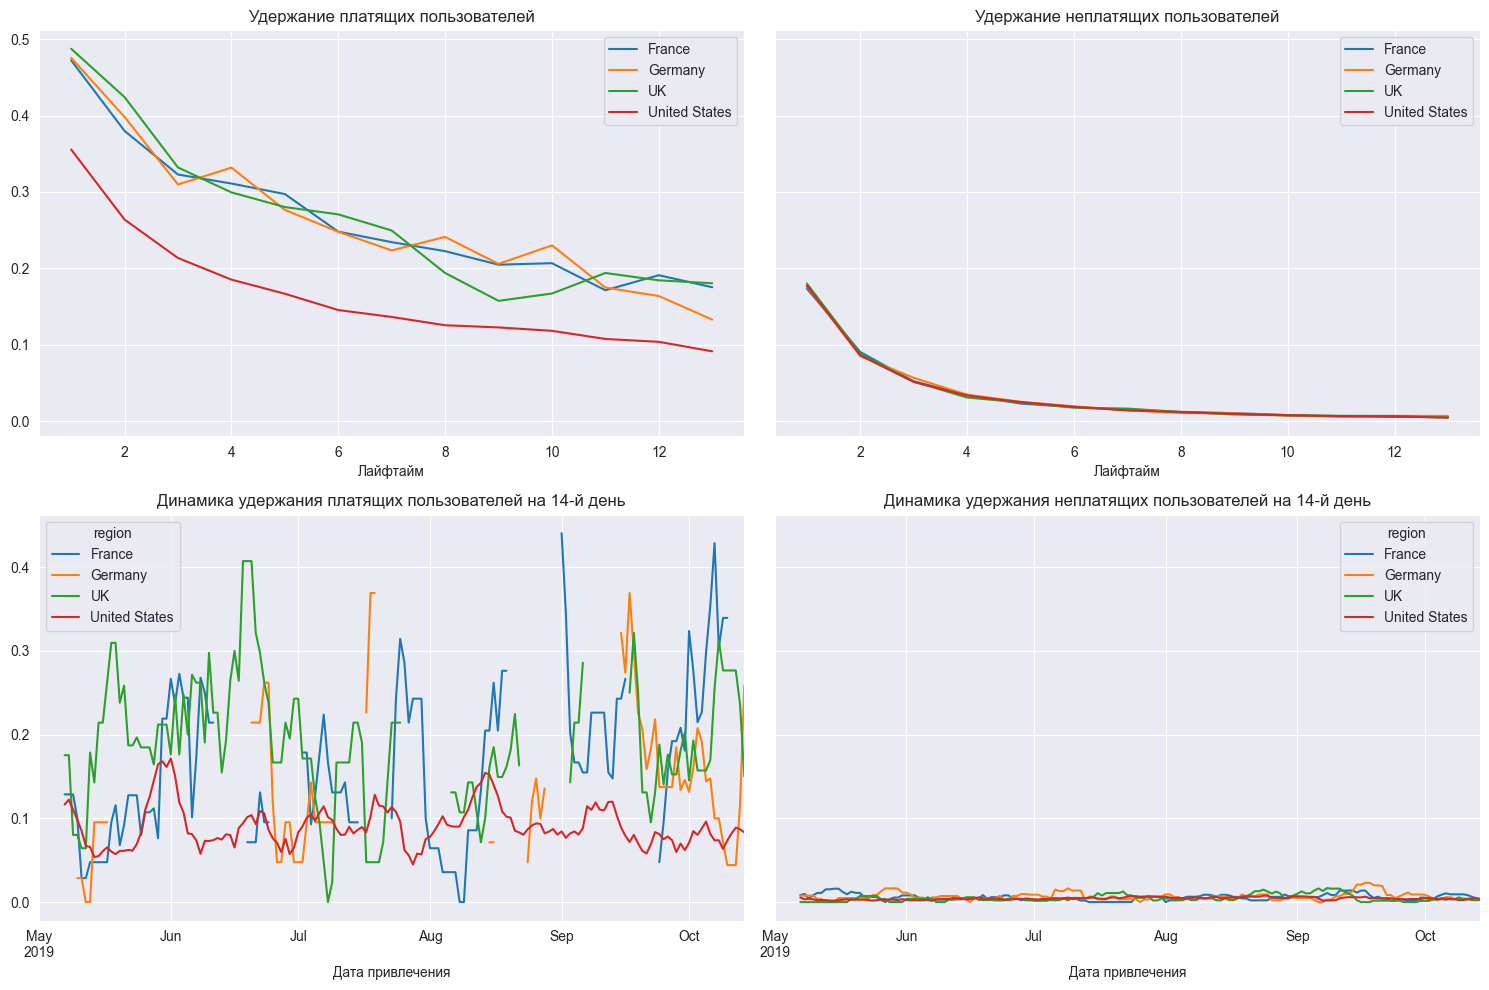

In [56]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, df, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Действительно, Американцы стабильно плохо удерживаются.  
Теперь проверим источники привлечения. Возможно, на окупаемость влияет неудачная реклама в каком-нибудь одном канале.

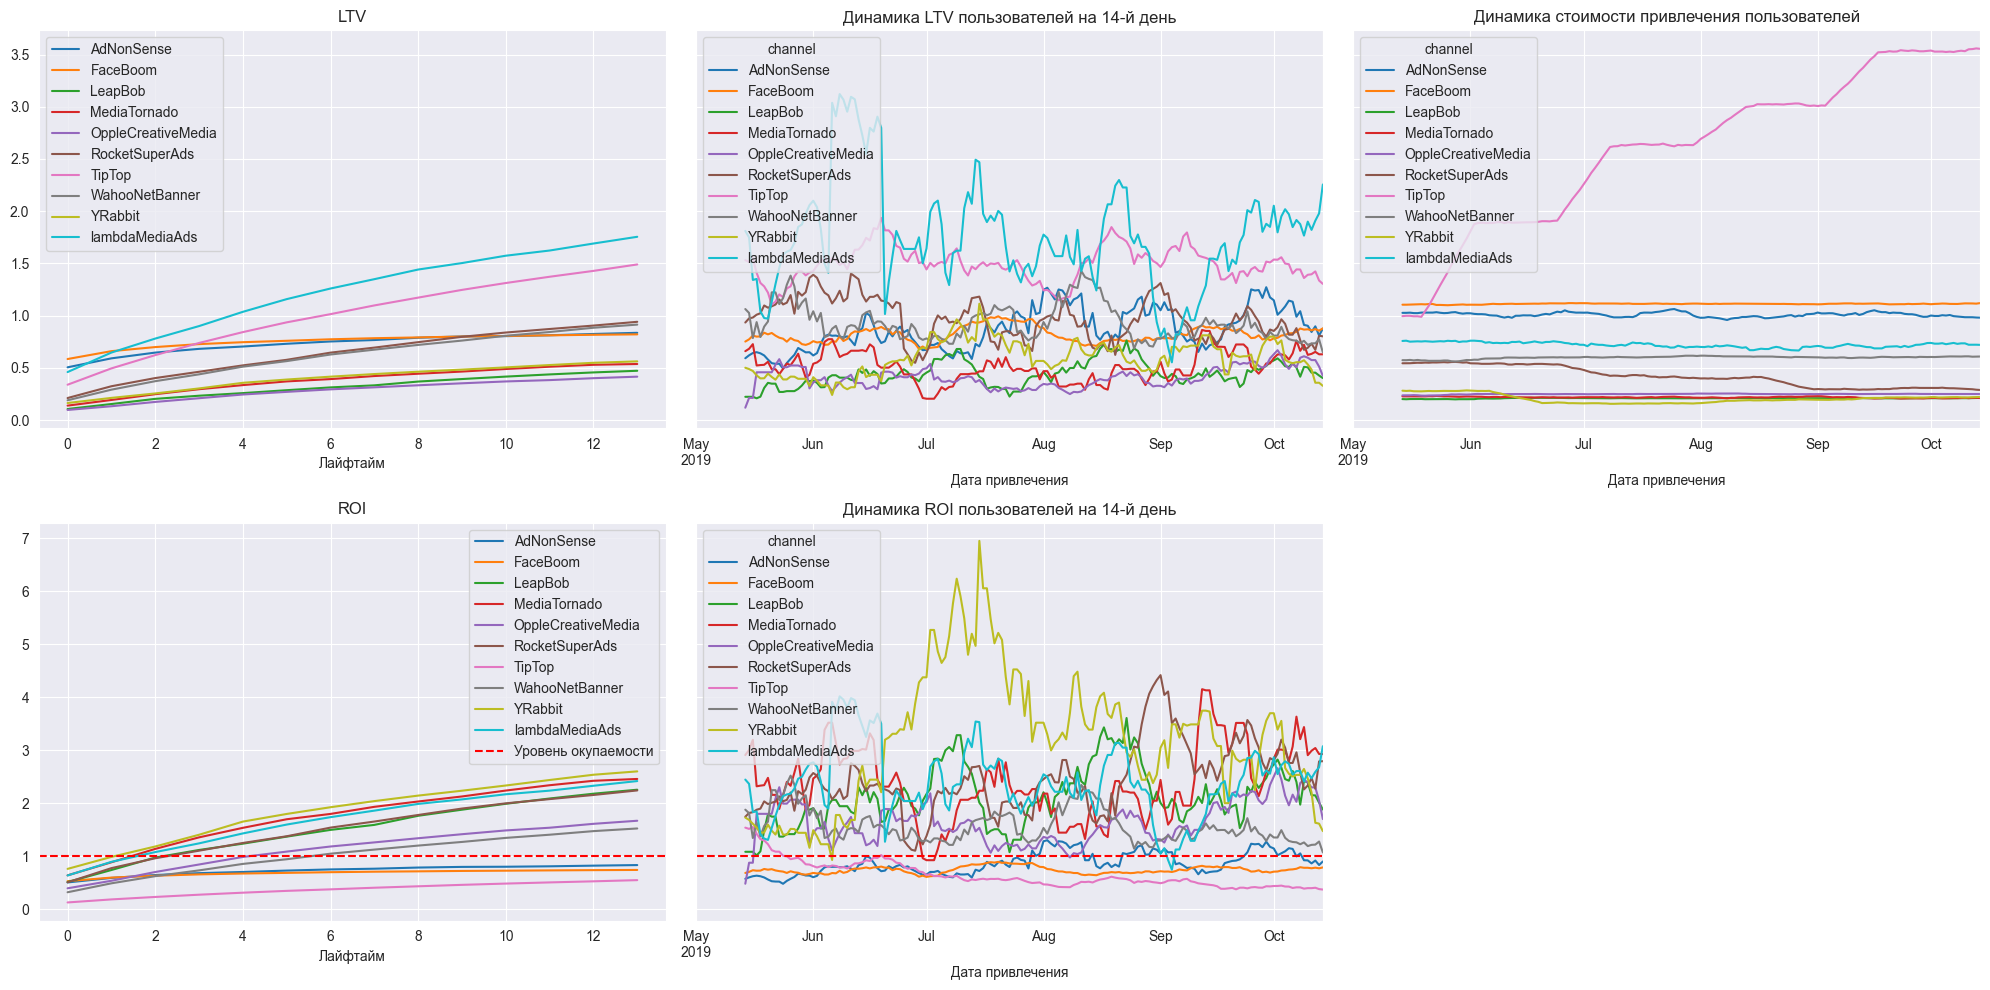

In [57]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

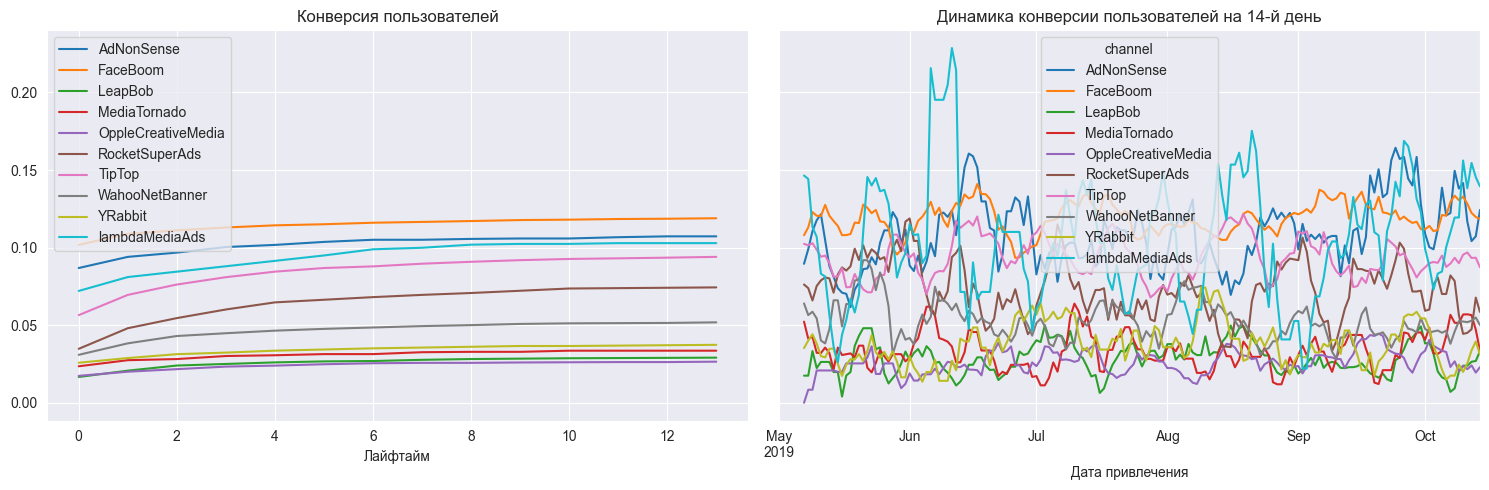

In [58]:
# смотрим конверсию с разбивкой по источникам привлечения

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

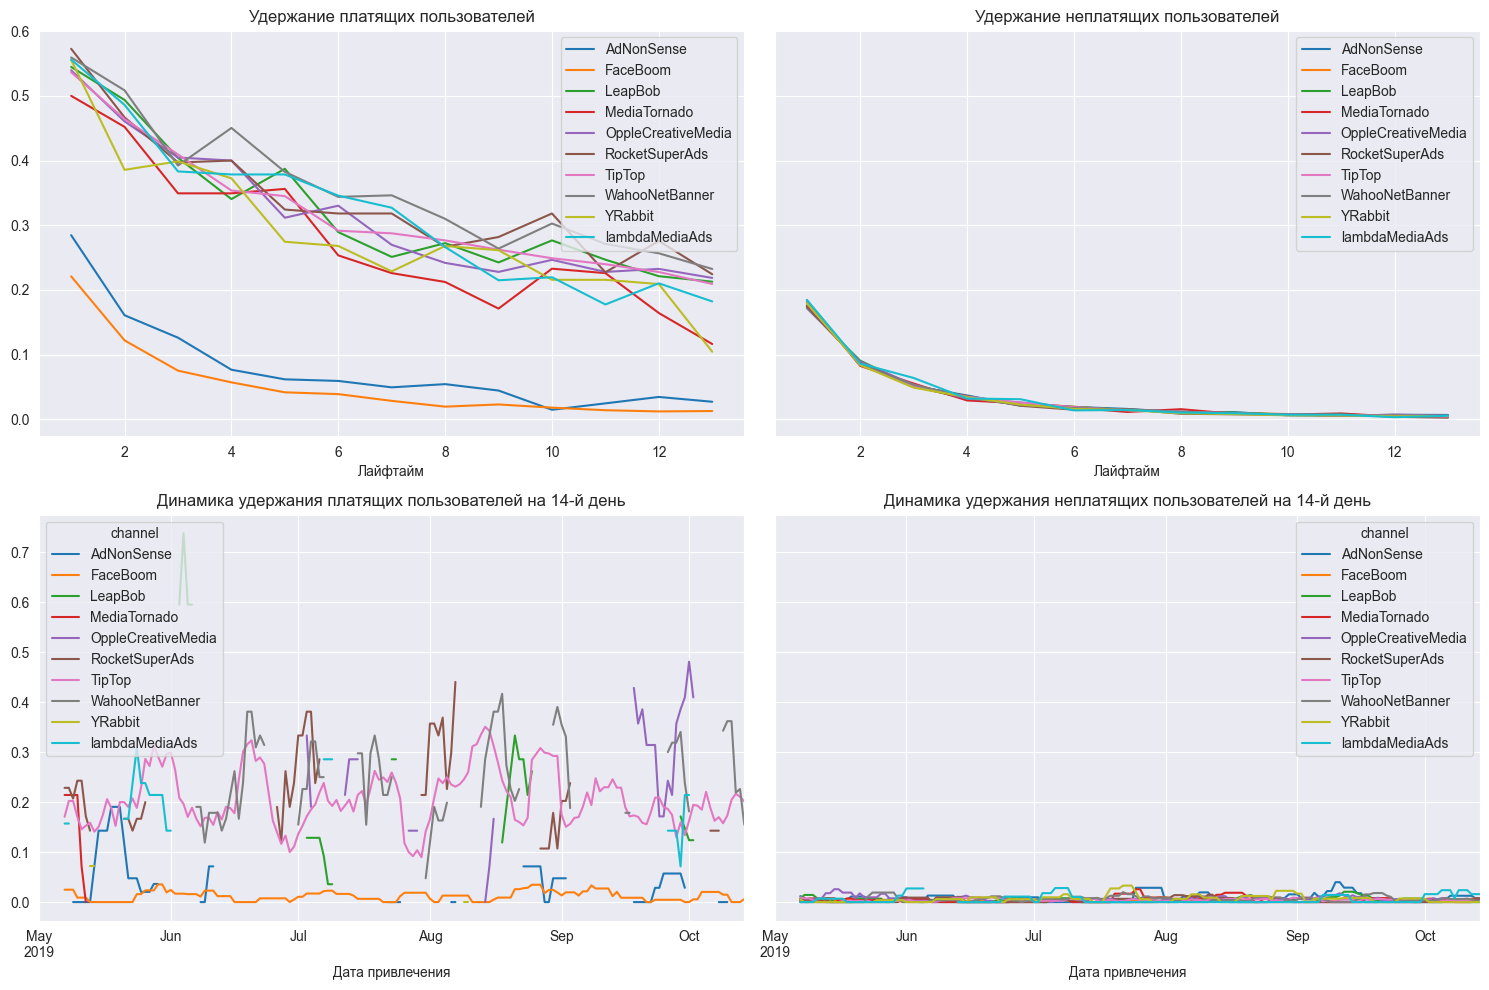

In [59]:
# смотрим удержание с разбивкой по источникам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, df, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Для полноты картины посмотрим, какой источник из какой страны приводит пользователей

In [68]:
profiles.groupby(['channel','region']).agg({'user_id': 'nunique'})

user_id
channel            region                
AdNonSense         France            1366
                   Germany           1219
                   UK                1295
FaceBoom           United States    29144
LeapBob            France            2988
                   Germany           2519
                   UK                3046
MediaTornado       United States     4364
OppleCreativeMedia France            2991
                   Germany           2562
                   UK                3052
RocketSuperAds     United States     4448
TipTop             United States    19561
WahooNetBanner     France            2971
                   Germany           2579
                   UK                3003
YRabbit            United States     4312
lambdaMediaAds     France             742
                   Germany            649
                   UK                 758

Ранее мы заметили, что Американцы приносят больше всего денег приложению, но стоимость их привлечения постоянно растет, и в отличае от Европейцев, эти пользователи не окупаются.  
Больше всего Американцев к нам пришло из `FaceBoom` 30000, порядка 5500 в месяц тратится на этот канал, он пригоняет нам больше всего пользователей, у них хорошая конверсия, но очень слабое удержание, пользователи делают одну покупку и пропадают. Независимо от даты привлечения, этот канал стабильно не окупается.  
Так же хочется выделить второй канал `TipTop`, который привлекает порядка 20000 Американцев, с каждым днем стоимость покупки трафика растет, но качество пользователей не меняется  и если до июня они еще окупались, то после приносят только убыток. `TipTop` и ранее попадал в поле нашего зрения, на него тратится больше всего денег и у него самые дорогие пользователи.   
Советовал бы присмотреться к ребятам из `YRabbit` , c  этого канала приходят так же Американцы, они очень дешево нам обходятся, надо внимательно изучить рекламную компанию с июля по август, в это время пользователи показывали хороший результат.  
Из Европейцев посмотрел бы на `lambdaMediaAds`  они окупаются, но со временем мы стали чуть меньше за них платить, что не пропорционально сказалось на LTV.  
`AdNonSense` по качеству похожи на пользователей `FaceBoom`, стоят средне, заходят делают одну покупку и все. Но в отличае от `FaceBoom` август/сентябрь показывали какие-то признаки на окупаемость. Возможно над ними можно поработать.  
Ну и последние, кого хотелось бы выделить, это пользователи из `RocketSuperAds`, на фоне остальных у них неплохое удержание, они нам очень дешево обходятся и приносят прибыль.  

Перейдём к устройствам.

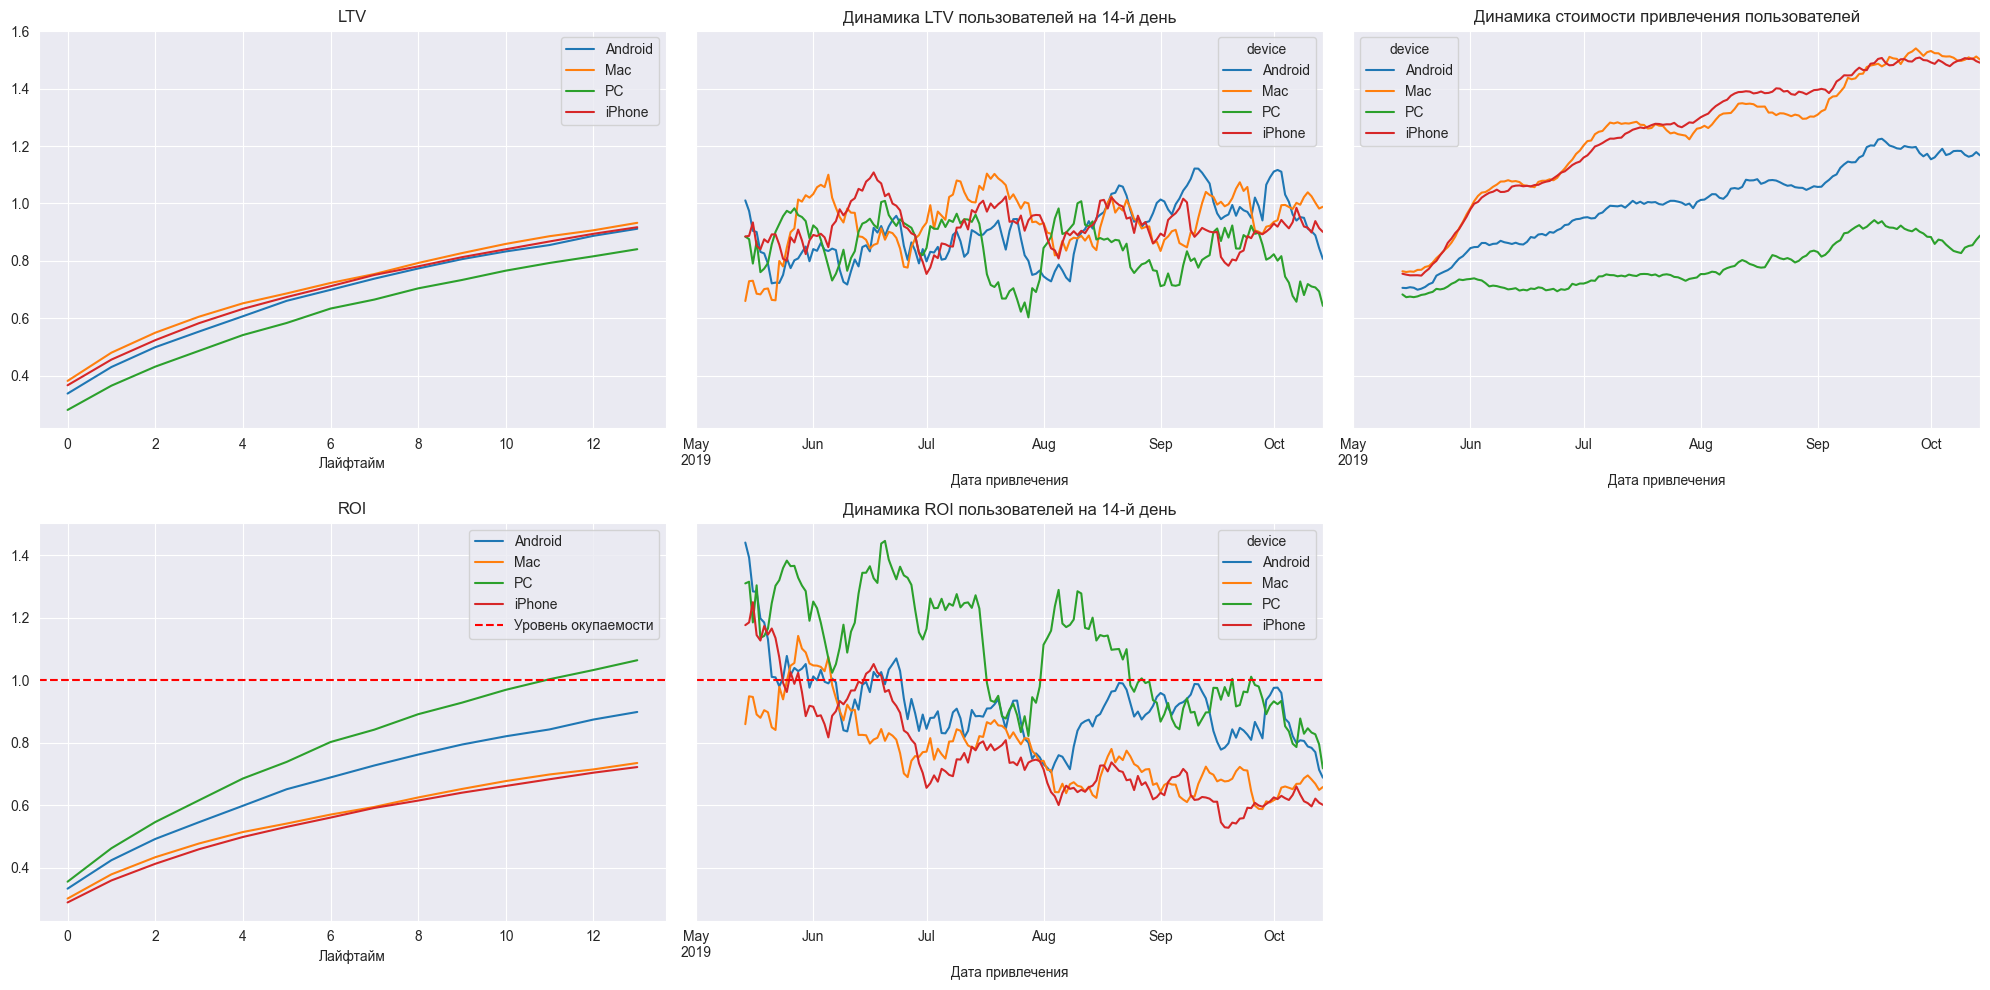

In [61]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Из устройств окупаются только пользователи ПС, почему то LTV упал у них в июле и потом в сентябре, надо с этим разобраться, а то и они могут перестать окупаться

Посчитаем и визуализируем конверсию, вызвав функции `get_conversion()` и `plot_conversion()`.

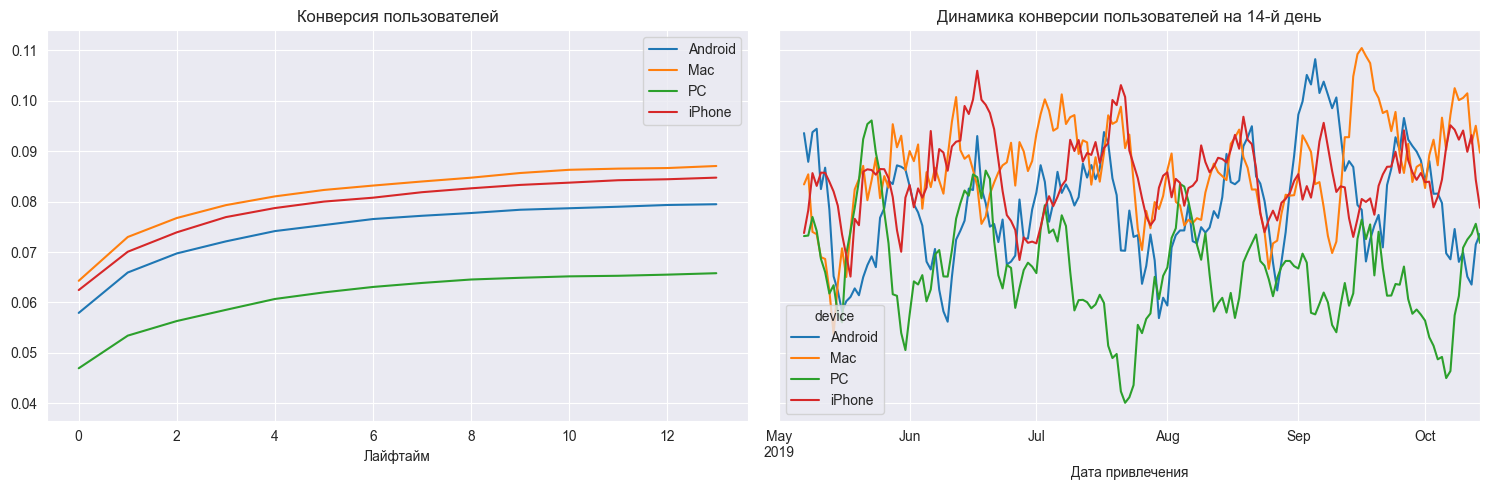

In [62]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

У нас окупаются только пользователи, которые заходят впервые с PC, но при этом они хуже всего конвертируются   
Пользователи продукции apple лучше конвертируются, но хуже всего окупаются.  
Посмотрим на удержание с разбивкой по устройствам

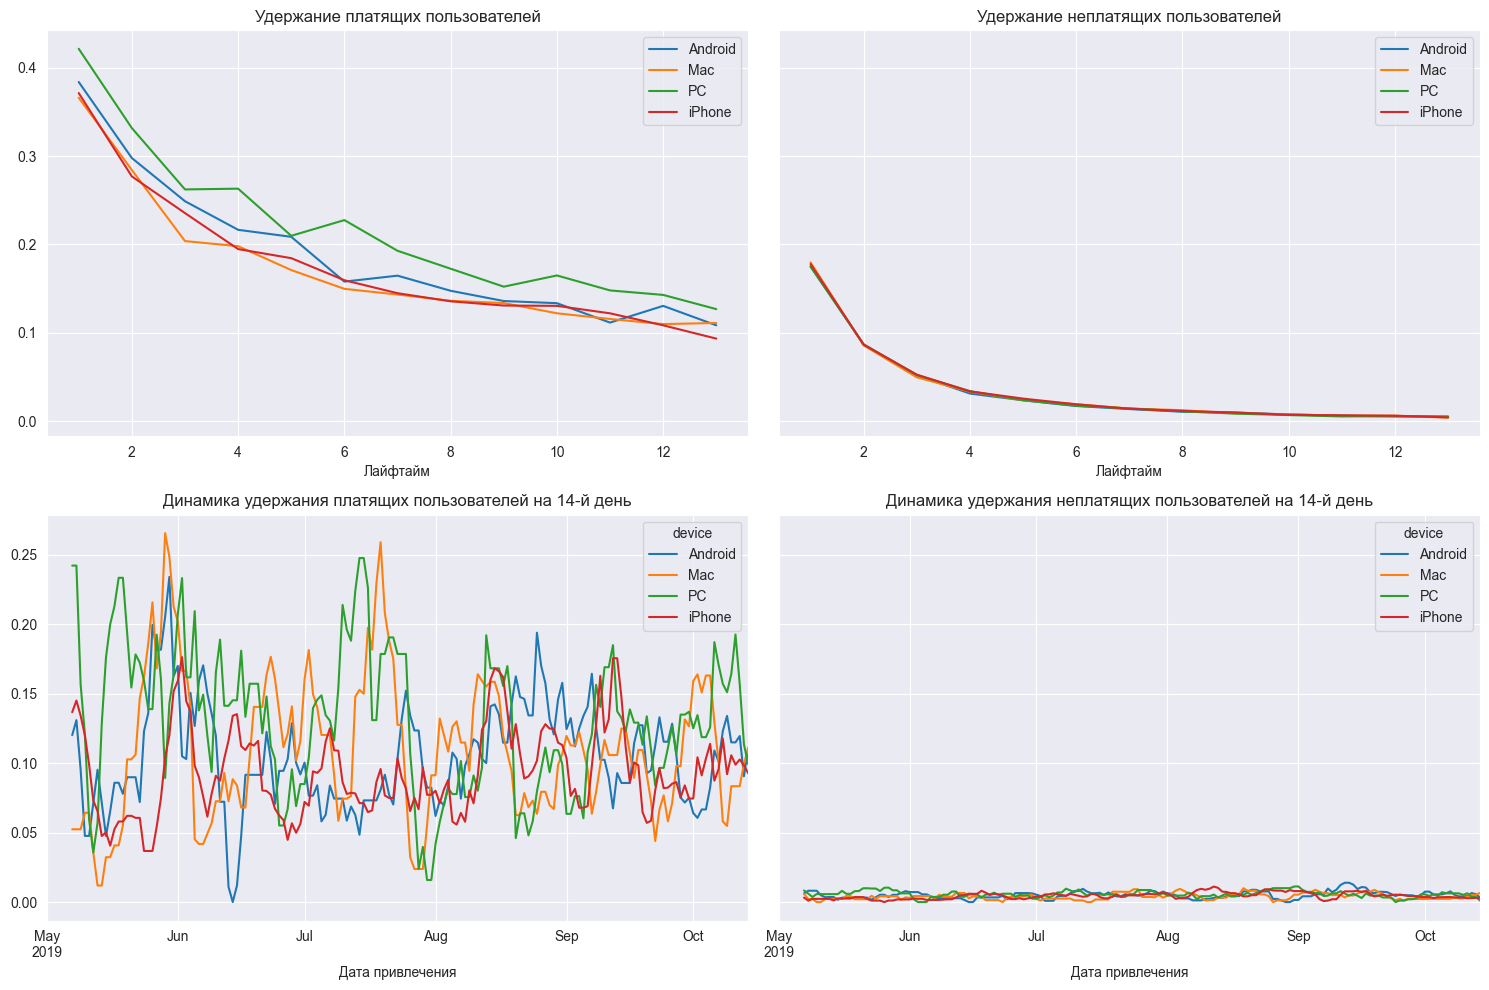

In [63]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, df, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Посмотрим как распределяются пользователи устройств по странам, это поможет понять есть ли какая то закономерность

In [64]:
profiles.groupby(['device', 'region'])['device'].count()

device   region       
Android  France            3313
         Germany           2849
         UK                3243
         United States    12436
Mac      France            1163
         Germany           1020
         UK                1086
         United States    15424
PC       France            4384
         Germany           3797
         UK                4551
         United States     6421
iPhone   France            2198
         Germany           1862
         UK                2274
         United States    27548
Name: device, dtype: int64

Неплатящие пользователи стабильно плохо удерживаются.  
Думаю в данный момент надо разобраться со странами и каналами привлечения и когда там наведем порядок, можно более детально изучить поведения пользователей на разных устройствах

### Напишим выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

У нас есть данные с 1 мая 2019 года, и почти с самого начала начали увеличивать бюджет для привлечения трафика.
Дороже всего в тот момент нам обходились пользователи из FaceBoom, тк пользователи из FaceBoom приходили к нам пачками и даже что то покупали, но не окупались, денег на этот канал особо не прибавили и сделали ставку на TipTop, которые в мае приносили прибыль. В октябре на него выделялась сумма в 4 раза превышающая майскую, пользователи из TipTop стали обходиться нам в среднем в 2,7, при нормальной стоимости менее 1. За счет того, что вырос САС у нас упал ROI и за две недели эти пользователи перестали окупаться.

В первую очередь я бы рекомендовал действовать аккуратно, принимать какое-то решение и внимательно смотреть как оно отразится на качестве пользователей. Рассматривать каждый канал привлечения в отдельности и пытаться его настроить.  
Можно выделить два рынка это США и Европа. Каналы, где мы закупаем трафик, специализируется или на одном или на другом рынке. 
Какой-то явной зависимости от устройства с которого впервые зашел пользователь в наше приложение в данный момент мною не выявлены. Думаю нам стоит наладить закупку трафика в зависимости от канала и потом уже более детально изучить поведение пользователей.  
В данный момент у нас неплохие показатели в Европе, но маленький объём пользователей, если нам интересная Европа, я бы советовал его нарастить. `AdNonSense` надо постараться улучшить удержание пользователей если это не удастся, то отказаться от их услуг.  По остальным каналам можно аккуратно нарастить закупку трафика и смотреть за поведением пользователей.  
По Америки:    
`FaceBoom` у нас большой приток пользователей, хорошая конверсия, но плохое удержание, пользователи делают один заказ и пропадают. Надо постараться улучшить удержание, спровоцировать их делать повторные заказы
`TipTop`  канал ни чем не примечательный, до мая 2019 особо не выделялся из обшей массы, надо разобраться, что привлекло к удорожанию привлечения пользователей, постараться вернуть стоимость к майским показателям, если не получится, то отказаться от размещения у них рекламы.
Советовал бы присмотреться к ребятам из `YRabbit`, c этого канала приходят так же Американцы, они очень дешево нам обходятся, надо внимательно изучить рекламную компанию с июля по август, в это время они показывали хороший результат. 
Можно постараться нарастить приток пользователей из этого канала. Так же увеличил бы закупку у `RocketSuperAds`
